In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("cpi_full_dataset.csv")
df

,year,month,value,category
0,2003,янв,100.6,fish
1,2003,фев,98.2,fish
2,2003,мар,100.4,fish
3,2003,апр,100.3,fish
4,2003,май,99.5,fish
...,...,...,...,...
2187,2025,июн,101.9,vegetables
2188,2025,июл,96.8,vegetables
2189,2025,авг,94.4,vegetables
2190,2025,сен,93.9,vegetables


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2192 non-null   int64  
 1   month     2192 non-null   object 
 2   value     2192 non-null   float64
 3   category  2192 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.6+ KB
None


In [10]:
df.head()

,year,month,value,category
0,2003,янв,100.6,fish
1,2003,фев,98.2,fish
2,2003,мар,100.4,fish
3,2003,апр,100.3,fish
4,2003,май,99.5,fish


In [11]:
df.describe()

,year,value
count,2192.000000,2192.000000
mean,2013.919708,100.743568
std,6.591762,4.815257
min,2003.000000,66.600000
25%,2008.000000,99.700000
50%,2014.000000,100.400000
75%,2020.000000,101.700000
max,2025.000000,132.000000


In [12]:
month_map = {
    "янв":1, "фев":2, "мар":3, "апр":4, "май":5, "июн":6,
    "июл":7, "авг":8, "сен":9, "окт":10, "ноя":11, "дек":12
}
df["month_num"] = df["month"].map(month_map)


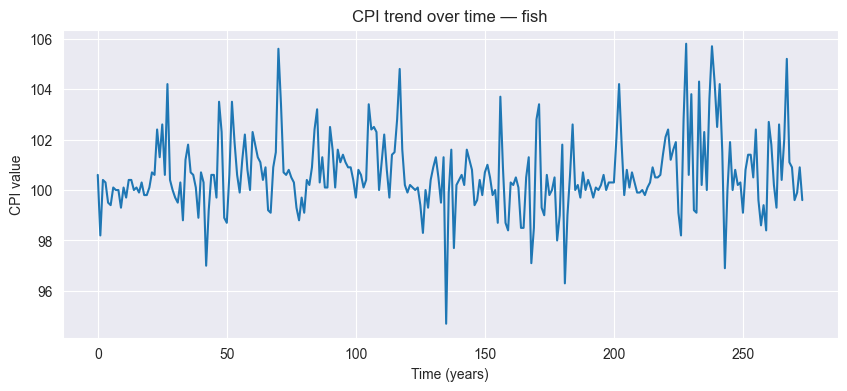

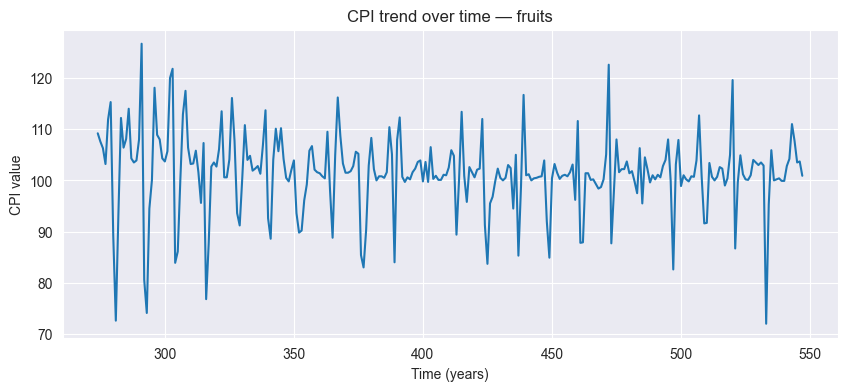

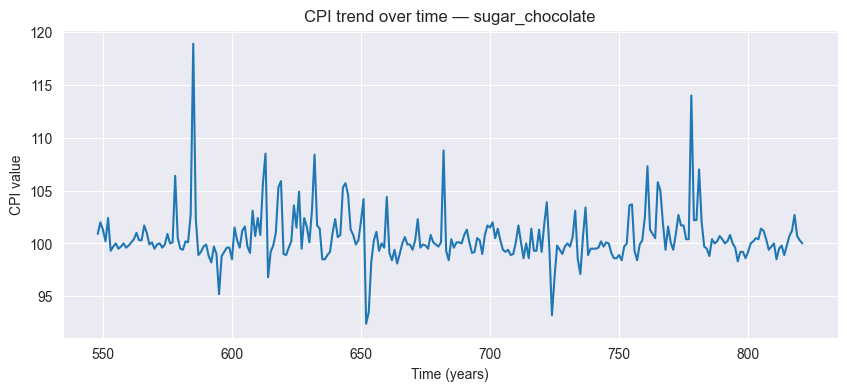

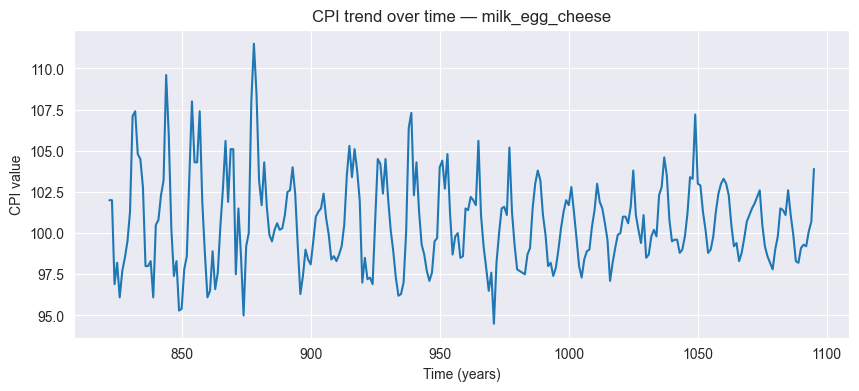

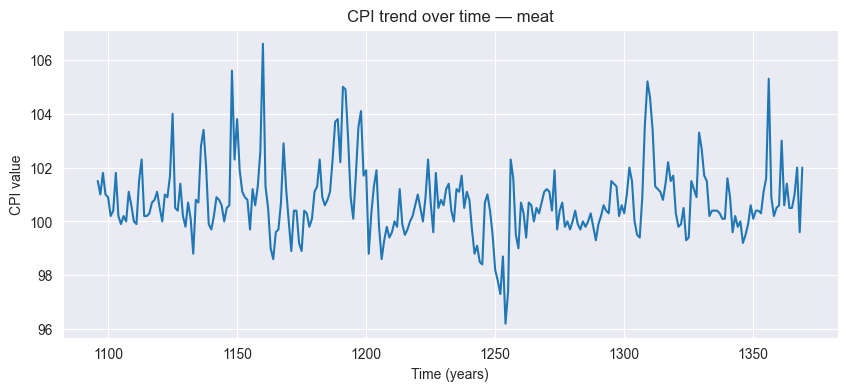

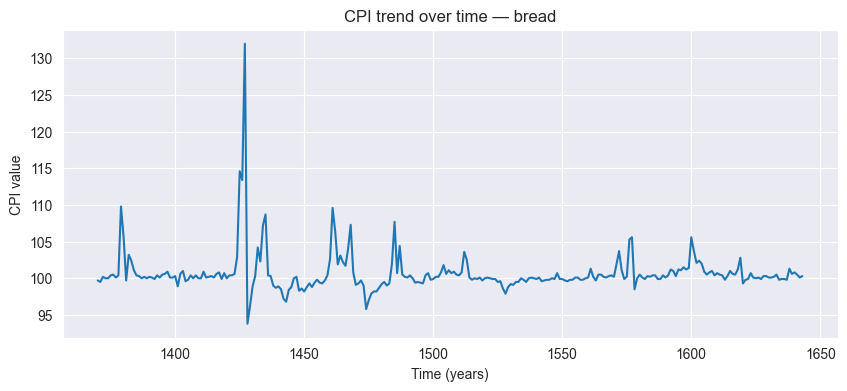

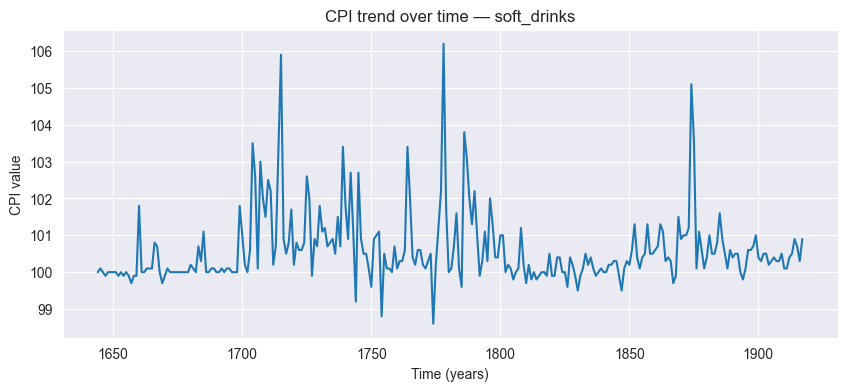

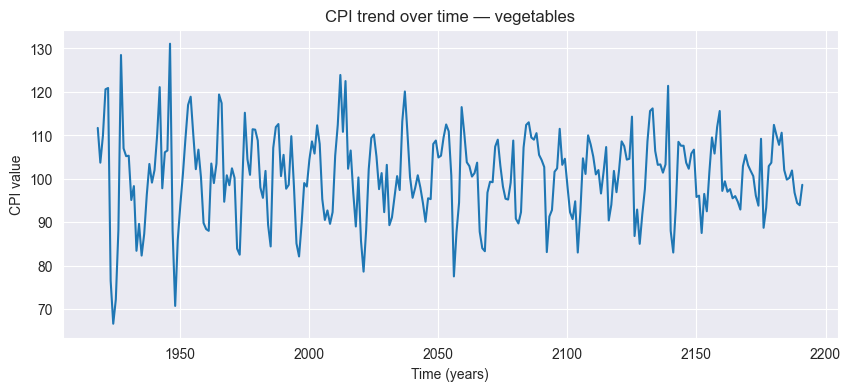

In [17]:
for category in df["category"].unique():
    subset = df[df["category"] == category].sort_values(["year", "month_num"])

    plt.figure(figsize=(10,4))
    plt.plot(subset["value"])
    plt.title(f"CPI trend over time — {category}")
    plt.xlabel("Time (years)")
    plt.ylabel("CPI value")
    plt.grid(True)
    plt.show()



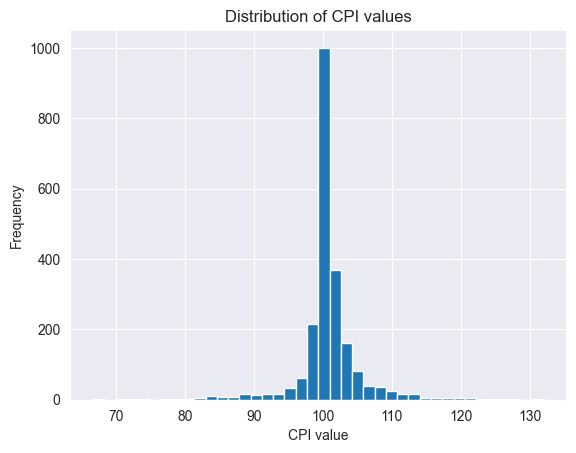

In [18]:
plt.hist(df["value"], bins=40)
plt.title("Distribution of CPI values")
plt.xlabel("CPI value")
plt.ylabel("Frequency")
plt.show()


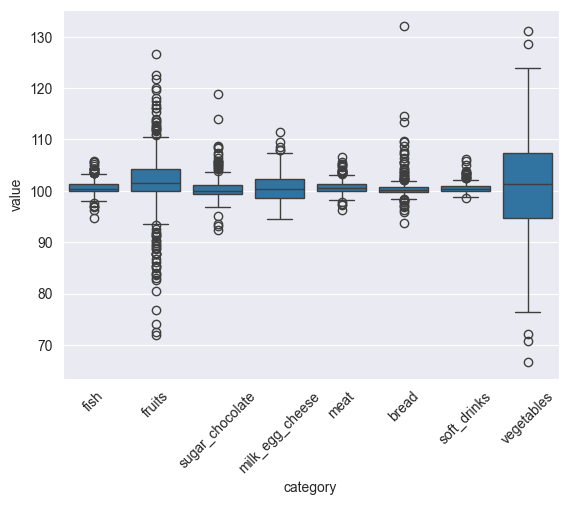

In [19]:
import seaborn as sns
sns.boxplot(x="category", y="value", data=df)
plt.xticks(rotation=45)
plt.show()


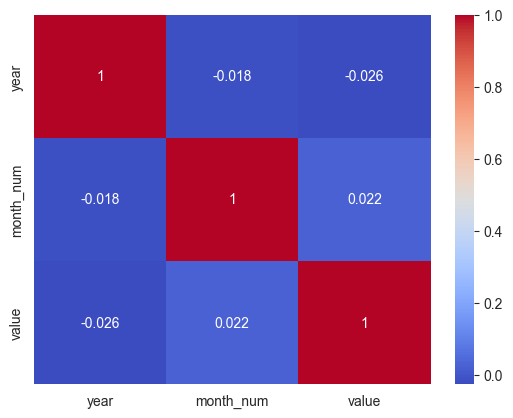

In [20]:
corr = df[["year", "month_num", "value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [21]:
df.groupby("month_num")["value"].mean()


month_num
1     102.205435
2     101.035326
3     100.934783
4     100.519022
5     100.640217
6     100.717935
7      98.225000
8      97.555435
9     100.152174
10    102.372283
11    102.232386
12    102.472727
Name: value, dtype: float64

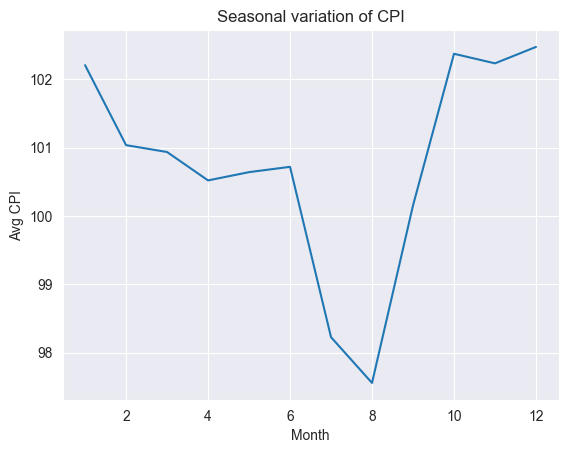

In [22]:
monthly_mean = df.groupby("month_num")["value"].mean()
plt.plot(monthly_mean)
plt.title("Seasonal variation of CPI")
plt.xlabel("Month")
plt.ylabel("Avg CPI")
plt.show()


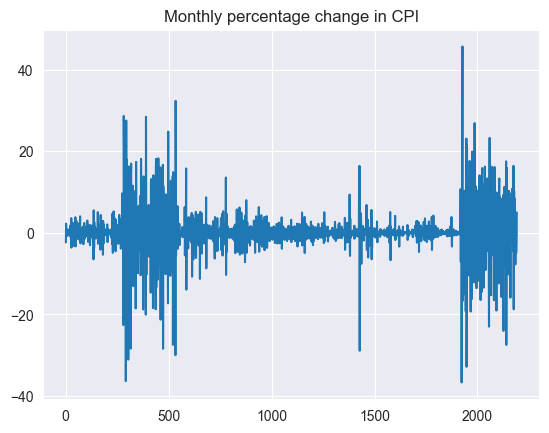

In [23]:
df["pct_change"] = df["value"].pct_change() * 100
plt.plot(df["pct_change"])
plt.title("Monthly percentage change in CPI")
plt.show()


In [24]:
df.groupby("category")["value"].mean().sort_values()


category
sugar_chocolate    100.560219
soft_drinks        100.608759
fish               100.626277
vegetables         100.649635
milk_egg_cheese    100.665328
bread              100.669343
meat               100.745620
fruits             101.423358
Name: value, dtype: float64

In [25]:
df.groupby("year")["value"].mean()


year
2003    100.883333
2004    100.387500
2005    101.458333
2006    100.618750
2007    101.698958
2008    102.011458
2009     99.776042
2010    101.894792
2011    100.427083
2012    100.713542
2013    100.415625
2014    101.168750
2015     99.711458
2016     99.994792
2017    100.137500
2018     99.793750
2019    100.502083
2020    101.117708
2021    101.176042
2022    101.388542
2023    100.559375
2024    100.366667
2025    100.931250
Name: value, dtype: float64

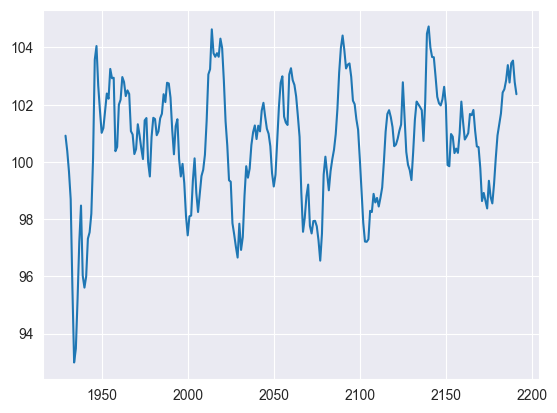

In [26]:
subset["roll"] = subset["value"].rolling(12).mean()
plt.plot(subset["roll"])


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[["year"]]
y = df["value"]

model.fit(X, y)
print(model.coef_, model.intercept_)


[-0.01892223] 138.85142921809785


## Summary of Analysis

This study provides a detailed exploratory and statistical analysis of consumer price index (CPI) data across multiple food categories from **2003 to 2025**, focusing on price dynamics, seasonality, and long-term inflation trends.

---

### 1. Descriptive Statistics

| Metric             | Value   |
|--------------------|---------|
| Time span          | 2003–2025 |
| Total observations | 2192    |
| Avg CPI value      | ~100.74 |
| Std. deviation     | ~4.82   |
| Min CPI            | 66.6    |
| Max CPI            | 132.0   |

> Most CPI values lie between **98 and 102**, indicating low short-term volatility and stable price dynamics.

---

### 2. Category-based observations

- Stable CPI categories:
  - `milk_egg_cheese`, `bread`, `meat`
- Seasonally volatile categories:
  - `vegetables`, `fruits`
- Moderate-volatility categories:
  - `fish`, `soft_drinks`, `sugar_chocolate`

> Seasonal products (like vegetables and fruits) show stronger cyclical patterns.

---

### 3. Temporal Patterns

- CPI shows gradual long-term inflation increase.
- Prices fluctuate depending on the month:
  - higher during winter
  - lower during harvest periods for plant-based products.
- Short-term price spikes observed occasionally across categories.

---

### 4. Distribution Analysis

The histogram of CPI values demonstrates:

- strong central peak around CPI = 100
- relatively low variance
- slight right-skew due to inflation growth in later years

> Indicates mostly stable price evolution rather than chaotic fluctuations.

---

### 5. Key Insights

- CPI values exhibit consistent upward trend across the two decades.
- Category behavior differs significantly:
  - stable pricing for some categories,
  - strong seasonal fluctuations for others.
- Price changes are largely predictable and cyclical.

---

### Conclusion

The CPI dataset provides clear evidence of stable price dynamics with predictable seasonal effects. Category-level analysis reveals distinct pricing behaviors that are essential for:
- price forecasting,
- inflation analysis,
- and economic modeling based on individual product groups.

